<a href="https://colab.research.google.com/github/debasishghosh-lab/CO2_Emission_Prediction/blob/main/Copy_of_Assignment_1_a_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# =====================================================
# Title: CO2 Emission Prediction using Linear Regression
# Author: Debasish Ghosh
# Date: 14-07-2025
# Description: Predict CO2 emissions from vehicle specs
# =====================================================




# ================== STEP 1: IMPORT REQUIRED LIBRARIES ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [4]:
# ================== STEP 2: LOAD THE DATASETS ==================
fuel_data = pd.read_csv('fuel_consumption_dataset.csv')
fuel_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
fuel_data.isnull()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
print("\n=== UNIQUE VALUES PER COLUMN (FUEL) ===")
for col in fuel_data.columns:
    print(f"{col}: {fuel_data[col].nunique()} unique values")


=== UNIQUE VALUES PER COLUMN (FUEL) ===
MODELYEAR: 1 unique values
MAKE: 39 unique values
MODEL: 663 unique values
VEHICLECLASS: 16 unique values
ENGINESIZE: 45 unique values
CYLINDERS: 7 unique values
TRANSMISSION: 22 unique values
FUELTYPE: 4 unique values
FUELCONSUMPTION_CITY: 167 unique values
FUELCONSUMPTION_HWY: 118 unique values
FUELCONSUMPTION_COMB: 148 unique values
FUELCONSUMPTION_COMB_MPG: 43 unique values
CO2EMISSIONS: 159 unique values


In [7]:
# ================== STEP 3: EXPLORE THE DATASETS ==================


print("\n=== FUEL DATASET INFO ===")
print(fuel_data.info())

print("\n=== FUEL DATASET DESCRIPTION ===")
print(fuel_data.describe())

print("\n=== MISSING VALUES (FUEL) ===")
print(fuel_data.isnull().sum())

print("\n=== UNIQUE VALUES PER COLUMN (FUEL) ===")
for col in fuel_data.columns:
    print(f"{col}: {fuel_data[col].nunique()} unique values")




=== FUEL DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
m

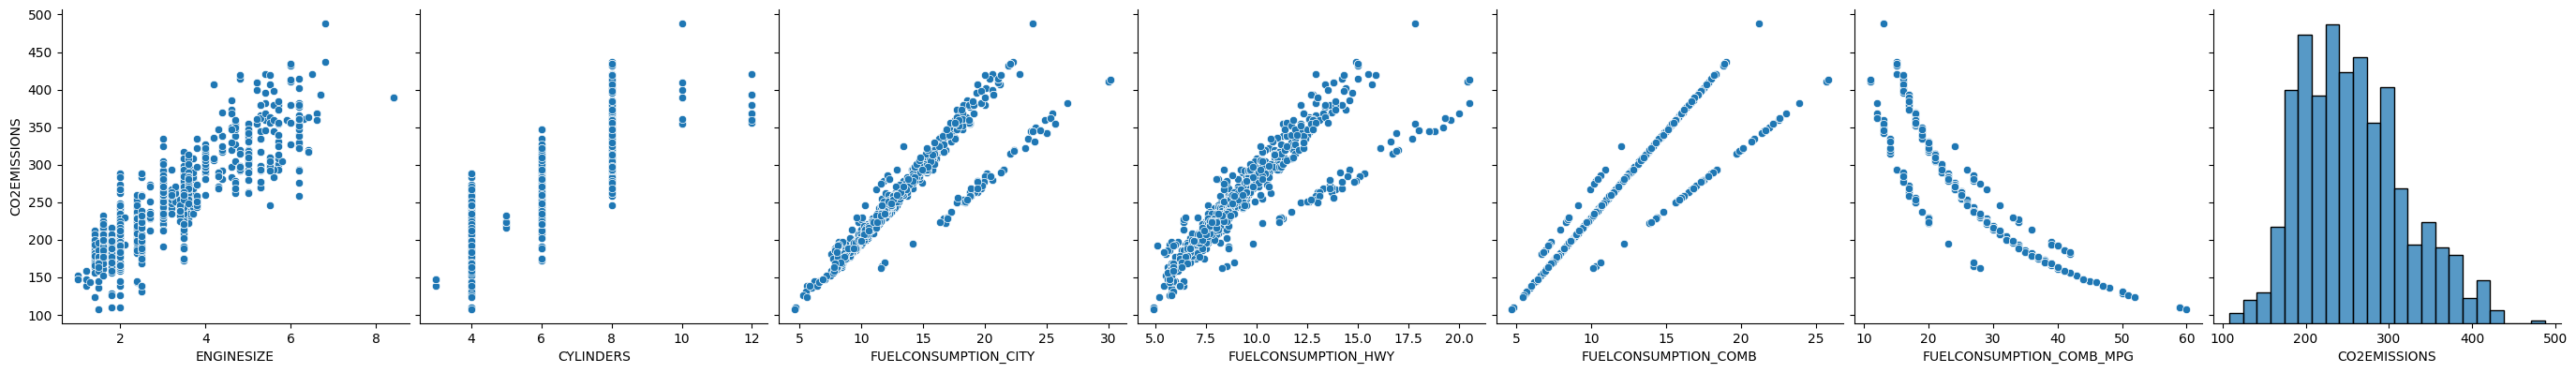

In [8]:

# Plot each selected feature vs CO2EMISSIONS in one row
sns.pairplot(
    data=fuel_data,
    x_vars=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
            'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS'],
    y_vars=['CO2EMISSIONS'],
    height=4,
    aspect=1
)

In [9]:
# ================== STEP 4: PREPROCESS THE DATASETS ==================
# Apply scaling to numeric features and one-hot encoding to categorical features



from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numeric and categorical columns
numeric_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']
categorical_cols = ['MAKE', 'MODEL', 'VEHICLECLASS', 'FUELTYPE', 'TRANSMISSION']

# Create transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X = preprocessor.fit_transform(fuel_data)
y = fuel_data['CO2EMISSIONS']


In [10]:
X.shape

(1067, 750)

In [11]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# # Step 1: Select features and target
# X = fuel_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
#                'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG',
#                'MAKE', 'MODEL', 'VEHICLECLASS', 'FUELTYPE', 'TRANSMISSION']]
# y = fuel_data['CO2EMISSIONS']

# # Step 2: Scale numeric columns
# numeric_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
#                 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']
# scaler = StandardScaler()
# X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# # Step 3: Encode categorical columns
# categorical_cols = ['MAKE', 'MODEL', 'VEHICLECLASS', 'FUELTYPE', 'TRANSMISSION']
# for col in categorical_cols:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col])

# y_car = fuel_data['CO2EMISSIONS']



In [12]:
# ================== STEP 5: TRAIN-TEST SPLIT ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# ================== STEP 6: MODEL TRAINING ==================
from sklearn.tree import DecisionTreeRegressor



#model_fuel = LinearRegression()

model_fuel = DecisionTreeRegressor(random_state=0)


model_fuel.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [14]:
# ================== STEP 7: MODEL PREDICTION ==================
y_pred = model_fuel.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print all metrics nicely
print(f"📊 Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

📊 Regression Evaluation Metrics:
Mean Absolute Error (MAE): 1.2243
Mean Squared Error (MSE): 27.5140
Root Mean Squared Error (RMSE): 5.2454
R² Score: 0.9933


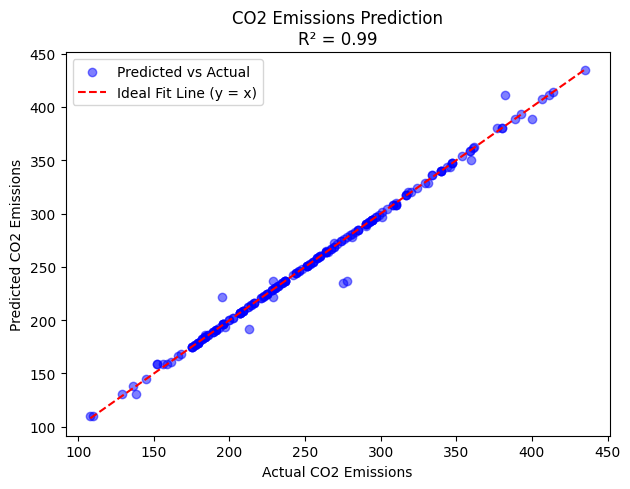

In [16]:
# ================== STEP 9: PLOTTING ==================
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot 1: CO2 Emissions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit Line (y = x)')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title(f'CO2 Emissions Prediction\nR² = {r2:.2f}')
plt.legend()

plt.tight_layout()
plt.show()
